In [1]:
import pandas as pd
import numpy as np
import json

from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [2]:
developer_profiles = pd.read_json('datasets/total_profiles.json').T
developer_profiles

,name,city,connections,role,company,experience,employment_type,skills
silvansky,Valentine Silvansky,Moscow,307,Senior Developer,Songsterr,15.83,unknown,"[JavaScript, Subversion, Carbon, Objective-C, ..."
vyacheslav-kruglov-2279421a5,Vyacheslav Kruglov,Russia,109,Senior Golang Developer,Yandex,4.5,Full-time,"[Git, go, Golang , SQL]"
denis-k-0a44327b,Denis K.,Moscow,500+,Senior Golang Developer,KASPERSKY LABS LIMITED,5.5,Full-time,"[docker, API Gateways, Google API, Hyperledger..."
denis-naletov,Denis Naletov,Moscow,32,Senior Developer,LAB SP,11.58,Full-time,"[Object-Oriented Programming (OOP), SAP FI, AB..."
anastasiia-sharabanova-101002172,Anastasiia Sharabanova,Russia,319,Senior Frontend Developer,OZON.ru,5.33,Full-time,"[Angular, JavaScript eXtension (JSX), Vuex, CS..."
...,...,...,...,...,...,...,...,...
александр-винокуров-480148140,Alex Vinokurov,Russia,7,Middle Angular Developer,СоларЛаб,5.42,Full-time,"[JavaScript, Angular, CSS, Управление командой..."
максим-пигалов-0154441aa,Максим Пигалов,Penza,25,Middle Frontend Developer,Senté,5.0,Full-time,"[React, JavaScript, CSS, HTML]"
advanture,Nikita Shishov,Russia,49,Middle Backend Developer,OneTaxi,4.33,Part-time,"[JavaScript, ООП, MySQL, SQL, Laravel, Веб-раз..."
grigoriy-pogrebnyak-929691119,Grigoriy Pogrebnyak,Russia,40,Middle Java Developer,Luxoft,0.0,unknown,[]


In [3]:
developer_reactions = pd.read_json('datasets/total_reactions.json', orient='index')
developer_reactions

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
anastasiia-miagkikh-b118a2168,Houdini ocean#oceanstorm #houdini,My new employee asked me one day for time off....,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
mirkadev,If you meet me you'll see that I'm fast. At ev...,It's my first day of a new jobWish me good luck 🍀,"Здравствуйте, я в поиске новой карьерной возмо...","Не прошло и двадцати с лишним лет, как OZON.ru...",I am extremely happy and grateful to say that ...,Всем привет! Мой крёстный сегодня был вынужден...,We're thrilled to be back on the streets of La...,"Today, we’re thrilled to announce the latest a...",Open source technology is a critical part of o...,Our self-driving car first started operating o...,...,None,None,None,None,None,None,None,None,None,None
elena-vidyakina-2b877990,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
biluta,"Я умею объяснять бизнесу что айтишники не ""о*е...",I’m happy to share that I’m starting a new pos...,Если есть стремление сделать свой бизнес лучше...,I’m happy to share that I’m start personal con...,"Hello, everyone!I will be in Oslo until August...",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
jjestyyy,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
александр-винокуров-480148140,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
максим-пигалов-0154441aa,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
advanture,"Действительно, делов-то 😁",I’m happy to share that I’m starting a new pos...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
grigoriy-pogrebnyak-929691119,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
developer_posts = pd.read_json('datasets/total_user_posts.json', orient='index')
developer_posts

,0,1,2,3,4,5,6,7,8,9
anastasiia-miagkikh-b118a2168,None,None,None,None,None,None,None,None,None,None
mirkadev,I've broken a new record for touch typing (onl...,None,None,None,None,None,None,None,None,None
elena-vidyakina-2b877990,None,None,None,None,None,None,None,None,None,None
biluta,None,None,None,None,None,None,None,None,None,None
jjestyyy,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
александр-винокуров-480148140,None,None,None,None,None,None,None,None,None,None
максим-пигалов-0154441aa,None,None,None,None,None,None,None,None,None,None
advanture,None,None,None,None,None,None,None,None,None,None
grigoriy-pogrebnyak-929691119,None,None,None,None,None,None,None,None,None,None


Собираем последние 2 датафрейма в листы и джойним. Плюсом выделим индексы с user_id в отдельную колонку

In [5]:
developer_profiles['reactions'] = developer_reactions.apply(list, axis=1)
developer_profiles['posts'] = developer_posts.apply(list, axis=1)
developer_profiles.reset_index(inplace=True)
developer_profiles.rename(columns={'index': 'user_id'}, inplace=True)
developer_profiles

,user_id,name,city,connections,role,company,experience,employment_type,skills,reactions,posts
0,silvansky,Valentine Silvansky,Moscow,307,Senior Developer,Songsterr,15.83,unknown,"[JavaScript, Subversion, Carbon, Objective-C, ...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
1,vyacheslav-kruglov-2279421a5,Vyacheslav Kruglov,Russia,109,Senior Golang Developer,Yandex,4.5,Full-time,"[Git, go, Golang , SQL]",[Привет!Меня зовут Максим Говоров. Вот уже 10 ...,"[None, None, None, None, None, None, None, Non..."
2,denis-k-0a44327b,Denis K.,Moscow,500+,Senior Golang Developer,KASPERSKY LABS LIMITED,5.5,Full-time,"[docker, API Gateways, Google API, Hyperledger...","[Today I started a new job at Apple!☁️, Do you...","[None, None, None, None, None, None, None, Non..."
3,denis-naletov,Denis Naletov,Moscow,32,Senior Developer,LAB SP,11.58,Full-time,"[Object-Oriented Programming (OOP), SAP FI, AB...",[LAB SP is hosting Развитие решений ЛАБ СП: но...,"[None, None, None, None, None, None, None, Non..."
4,anastasiia-sharabanova-101002172,Anastasiia Sharabanova,Russia,319,Senior Frontend Developer,OZON.ru,5.33,Full-time,"[Angular, JavaScript eXtension (JSX), Vuex, CS...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
...,...,...,...,...,...,...,...,...,...,...,...
364,александр-винокуров-480148140,Alex Vinokurov,Russia,7,Middle Angular Developer,СоларЛаб,5.42,Full-time,"[JavaScript, Angular, CSS, Управление командой...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
365,максим-пигалов-0154441aa,Максим Пигалов,Penza,25,Middle Frontend Developer,Senté,5.0,Full-time,"[React, JavaScript, CSS, HTML]","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
366,advanture,Nikita Shishov,Russia,49,Middle Backend Developer,OneTaxi,4.33,Part-time,"[JavaScript, ООП, MySQL, SQL, Laravel, Веб-раз...","[Действительно, делов-то 😁, I’m happy to share...","[None, None, None, None, None, None, None, Non..."
367,grigoriy-pogrebnyak-929691119,Grigoriy Pogrebnyak,Russia,40,Middle Java Developer,Luxoft,0.0,unknown,[],"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."


Удаляем задублировавшихся пользователей

In [6]:
developer_profiles = developer_profiles[~developer_profiles.user_id.duplicated()]

2 дубликата по id убрали.

Видно, что некоторые данные (стаж) при сохранении результатов "поплыли". Колонки `company` и `employment_type` в некоторых случаях сменились местами. Посмотрим на эти профили

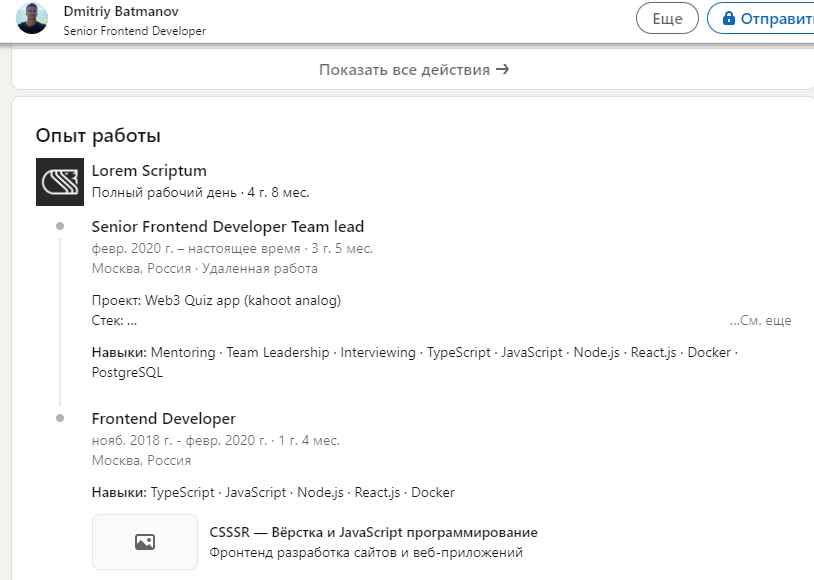

Судя по профилю участника `d-batmanov` эта информация о последнем месте работы. У остальных участников есть только общий опыт в колонке `experience`.

Жаль, что потеряли названия компаний. Заменим их на `unknown`. Колонку `employment_type` перезаполнять не будем

In [7]:
developer_profiles.loc[developer_profiles['employment_type'].str.contains('yrs') | developer_profiles['employment_type'].str.contains('mos'), 'company'] = 'unknown'
developer_profiles

,user_id,name,city,connections,role,company,experience,employment_type,skills,reactions,posts
0,silvansky,Valentine Silvansky,Moscow,307,Senior Developer,Songsterr,15.83,unknown,"[JavaScript, Subversion, Carbon, Objective-C, ...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
1,vyacheslav-kruglov-2279421a5,Vyacheslav Kruglov,Russia,109,Senior Golang Developer,Yandex,4.5,Full-time,"[Git, go, Golang , SQL]",[Привет!Меня зовут Максим Говоров. Вот уже 10 ...,"[None, None, None, None, None, None, None, Non..."
2,denis-k-0a44327b,Denis K.,Moscow,500+,Senior Golang Developer,KASPERSKY LABS LIMITED,5.5,Full-time,"[docker, API Gateways, Google API, Hyperledger...","[Today I started a new job at Apple!☁️, Do you...","[None, None, None, None, None, None, None, Non..."
3,denis-naletov,Denis Naletov,Moscow,32,Senior Developer,LAB SP,11.58,Full-time,"[Object-Oriented Programming (OOP), SAP FI, AB...",[LAB SP is hosting Развитие решений ЛАБ СП: но...,"[None, None, None, None, None, None, None, Non..."
4,anastasiia-sharabanova-101002172,Anastasiia Sharabanova,Russia,319,Senior Frontend Developer,OZON.ru,5.33,Full-time,"[Angular, JavaScript eXtension (JSX), Vuex, CS...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
...,...,...,...,...,...,...,...,...,...,...,...
364,александр-винокуров-480148140,Alex Vinokurov,Russia,7,Middle Angular Developer,СоларЛаб,5.42,Full-time,"[JavaScript, Angular, CSS, Управление командой...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
365,максим-пигалов-0154441aa,Максим Пигалов,Penza,25,Middle Frontend Developer,Senté,5.0,Full-time,"[React, JavaScript, CSS, HTML]","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
366,advanture,Nikita Shishov,Russia,49,Middle Backend Developer,OneTaxi,4.33,Part-time,"[JavaScript, ООП, MySQL, SQL, Laravel, Веб-раз...","[Действительно, делов-то 😁, I’m happy to share...","[None, None, None, None, None, None, None, Non..."
367,grigoriy-pogrebnyak-929691119,Grigoriy Pogrebnyak,Russia,40,Middle Java Developer,Luxoft,0.0,unknown,[],"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."


Все юзеры разработчики (developer). Релевантными будем считать юзеров, у которых общий опыт >= 3 лет, либо имеют `senior` в названии должности. `middle` в данном случае брать не будем, потому что в разных компаниях разные градации

In [8]:
developer_profiles = developer_profiles[developer_profiles['experience'] >= 3 | developer_profiles.role.str.lower().str.contains('senior')]
developer_profiles.head()

,user_id,name,city,connections,role,company,experience,employment_type,skills,reactions,posts
0,silvansky,Valentine Silvansky,Moscow,307,Senior Developer,Songsterr,15.83,unknown,"[JavaScript, Subversion, Carbon, Objective-C, ...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
1,vyacheslav-kruglov-2279421a5,Vyacheslav Kruglov,Russia,109,Senior Golang Developer,Yandex,4.5,Full-time,"[Git, go, Golang , SQL]",[Привет!Меня зовут Максим Говоров. Вот уже 10 ...,"[None, None, None, None, None, None, None, Non..."
2,denis-k-0a44327b,Denis K.,Moscow,500+,Senior Golang Developer,KASPERSKY LABS LIMITED,5.5,Full-time,"[docker, API Gateways, Google API, Hyperledger...","[Today I started a new job at Apple!☁️, Do you...","[None, None, None, None, None, None, None, Non..."
3,denis-naletov,Denis Naletov,Moscow,32,Senior Developer,LAB SP,11.58,Full-time,"[Object-Oriented Programming (OOP), SAP FI, AB...",[LAB SP is hosting Развитие решений ЛАБ СП: но...,"[None, None, None, None, None, None, None, Non..."
4,anastasiia-sharabanova-101002172,Anastasiia Sharabanova,Russia,319,Senior Frontend Developer,OZON.ru,5.33,Full-time,"[Angular, JavaScript eXtension (JSX), Vuex, CS...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."


In [9]:
developer_profiles.shape

(290, 11)

Оставили 290 релевантных. Объединим в список все посты, раскроем и почистим от дубликатов

In [10]:
developer_profiles['reactions_and_posts'] = developer_profiles['reactions'] + developer_profiles['posts']
developer_profiles.drop(['posts','reactions'], axis=1, inplace=True)
developer_profiles = developer_profiles.explode('reactions_and_posts')
developer_profiles.drop_duplicates('reactions_and_posts', inplace=True)
developer_profiles.dropna(subset='reactions_and_posts', inplace=True)
developer_profiles.reset_index(drop=True, inplace=True)
developer_profiles

C:\Users\Felixalex\AppData\Local\Temp\ipykernel_3136\3245858745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developer_profiles['reactions_and_posts'] = developer_profiles['reactions'] + developer_profiles['posts']
C:\Users\Felixalex\AppData\Local\Temp\ipykernel_3136\3245858745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developer_profiles.drop(['posts','reactions'], axis=1, inplace=True)


,user_id,name,city,connections,role,company,experience,employment_type,skills,reactions_and_posts
0,vyacheslav-kruglov-2279421a5,Vyacheslav Kruglov,Russia,109,Senior Golang Developer,Yandex,4.5,Full-time,"[Git, go, Golang , SQL]",Привет!Меня зовут Максим Говоров. Вот уже 10 л...
1,denis-k-0a44327b,Denis K.,Moscow,500+,Senior Golang Developer,KASPERSKY LABS LIMITED,5.5,Full-time,"[docker, API Gateways, Google API, Hyperledger...",Today I started a new job at Apple!☁️
2,denis-k-0a44327b,Denis K.,Moscow,500+,Senior Golang Developer,KASPERSKY LABS LIMITED,5.5,Full-time,"[docker, API Gateways, Google API, Hyperledger...",Do you agree?
3,denis-k-0a44327b,Denis K.,Moscow,500+,Senior Golang Developer,KASPERSKY LABS LIMITED,5.5,Full-time,"[docker, API Gateways, Google API, Hyperledger...",Progress 👍
4,denis-naletov,Denis Naletov,Moscow,32,Senior Developer,LAB SP,11.58,Full-time,"[Object-Oriented Programming (OOP), SAP FI, AB...",LAB SP is hosting Развитие решений ЛАБ СП: нов...
...,...,...,...,...,...,...,...,...,...,...
1611,sergey-frolov-8a57301a4,Sergey Frolov,Kazakhstan,500+,Java Developer | Back-end | Product Developmen...,Orbita center,8.0,Full-time,"[Hibernate, PostgreSQL, Microservices, Redis, ...",Microscopy is fascinating!
1612,sergey-frolov-8a57301a4,Sergey Frolov,Kazakhstan,500+,Java Developer | Back-end | Product Developmen...,Orbita center,8.0,Full-time,"[Hibernate, PostgreSQL, Microservices, Redis, ...",Magic 🙋‍♂️👊😆#code #coding #codinglife #javascr...
1613,sergey-frolov-8a57301a4,Sergey Frolov,Kazakhstan,500+,Java Developer | Back-end | Product Developmen...,Orbita center,8.0,Full-time,"[Hibernate, PostgreSQL, Microservices, Redis, ...","Всем привет!Хочу проверить, пользуются LinkedI..."
1614,advanture,Nikita Shishov,Russia,49,Middle Backend Developer,OneTaxi,4.33,Part-time,"[JavaScript, ООП, MySQL, SQL, Laravel, Веб-раз...",I’m happy to share that I’m starting a new pos...


In [11]:
developer_profiles.to_json('datasets/developer_profiles.json')

Дано:
2 датафрейма с постами и соответствующими юзерами, поставивших реакции

Оставляем только релевантных юзеров

In [12]:
import pandas as pd
import numpy as np
import json
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [13]:
df = pd.read_json('datasets/posts.json', orient='index')
df.reset_index(drop=True, inplace=True)
df

,0,1
0,"🎓В EDtech компанию ищем второго дизайнера, кот...",{'https://www.linkedin.com/in/ACoAACWwVPkBv6-7...
1,Продолжению открытой менторской сессии “Тимлид...,{'https://www.linkedin.com/in/ACoAAAhdAtwBgdYk...
2,"Чудесна новина! 😎 ⭐ Natalia Konova M.D., съосн...",{'https://www.linkedin.com/in/ACoAABORW8gBBKOr...
3,🚀 Are you looking to enter the world of develo...,{'https://www.linkedin.com/in/ACoAAC9nLzEBwQR3...
4,Learning UX Writing with a Mentor 😎 Are you lo...,{'https://www.linkedin.com/in/ACoAADwvex4ByMeM...
...,...,...
561,#отзыв #pitstop #бизнес_тренинг ОТЗЫВ СВЕТЛАН...,{'https://www.linkedin.com/in/ACoAAAJNeXQBhcX7...
562,"Вы ходите на собеседования, рассказываете о се...",{'https://www.linkedin.com/in/ACoAAAMAhHQBDk2Y...
563,ОПЫТ + КОУЧИНГ ТВОРИТ ЧУДЕСА🔥Хочу поделиться с...,{'https://www.linkedin.com/in/ACoAABT7hBIBK83R...
564,Маршалл ГолдсмитБыл у него на тренинге лет 5 н...,{'https://www.linkedin.com/in/ACoAABHz7dkBH-8B...


В идеале нам нужно сходить на линк каждого юзера, отреагировавшего на пост, но алгоритмы Linkedin'а нас быстро забанят. Поэтому будем работать с тем, что есть

In [14]:
df.columns = ['post_text','reacted_users_info']
df

,post_text,reacted_users_info
0,"🎓В EDtech компанию ищем второго дизайнера, кот...",{'https://www.linkedin.com/in/ACoAACWwVPkBv6-7...
1,Продолжению открытой менторской сессии “Тимлид...,{'https://www.linkedin.com/in/ACoAAAhdAtwBgdYk...
2,"Чудесна новина! 😎 ⭐ Natalia Konova M.D., съосн...",{'https://www.linkedin.com/in/ACoAABORW8gBBKOr...
3,🚀 Are you looking to enter the world of develo...,{'https://www.linkedin.com/in/ACoAAC9nLzEBwQR3...
4,Learning UX Writing with a Mentor 😎 Are you lo...,{'https://www.linkedin.com/in/ACoAADwvex4ByMeM...
...,...,...
561,#отзыв #pitstop #бизнес_тренинг ОТЗЫВ СВЕТЛАН...,{'https://www.linkedin.com/in/ACoAAAJNeXQBhcX7...
562,"Вы ходите на собеседования, рассказываете о се...",{'https://www.linkedin.com/in/ACoAAAMAhHQBDk2Y...
563,ОПЫТ + КОУЧИНГ ТВОРИТ ЧУДЕСА🔥Хочу поделиться с...,{'https://www.linkedin.com/in/ACoAABT7hBIBK83R...
564,Маршалл ГолдсмитБыл у него на тренинге лет 5 н...,{'https://www.linkedin.com/in/ACoAABHz7dkBH-8B...


У нас нет большого размеченного датасета чтобы сделать ML-модель определяющую насколько тот или иной юзер для нас релевантен. Поэтому будем визуализировать "облако названий профессий" и убирать из них не-it и около-it специальности.

Оставим профессии со словами `middle`, `senior`, `lead` и исключим нерелевантные специальности

In [15]:
def relevant_users_extraction(reactions_info):
    '''функция фильтрует профессии и оставляет только те, которые соответствуют релевантному паттерну'''
    relevant_list = ['senior', 'middle','lead']
    not_relevant_list = ['hr','recruiter','manager','looking','consultant','seo','консультант', 'management']
    relevant = {}
    job_titles = []
    for link, user_info in reactions_info.items():
        true_pattern = [x in user_info[1].lower() for x in relevant_list]
        wrong_pattern = [x in user_info[1].lower() for x in not_relevant_list]
        pattern = any(true_pattern) and not any(wrong_pattern)
        if pattern:
            relevant[link] = user_info
            job_titles.append(user_info[1])
    job_titles = ' '.join(job_titles)
    return relevant, job_titles

In [16]:
df['relevant_users_info'], df['relevant_users_jobs'] = zip(*df.reacted_users_info.apply(relevant_users_extraction))
df['relevant_reactions_count'] = df.relevant_users_info.apply(len)
df

,post_text,reacted_users_info,relevant_users_info,relevant_users_jobs,relevant_reactions_count
0,"🎓В EDtech компанию ищем второго дизайнера, кот...",{'https://www.linkedin.com/in/ACoAACWwVPkBv6-7...,{'https://www.linkedin.com/in/ACoAAAMUSTMBzF6i...,Lead Software Test Automation Engineer Lead Fr...,2
1,Продолжению открытой менторской сессии “Тимлид...,{'https://www.linkedin.com/in/ACoAAAhdAtwBgdYk...,{},,0
2,"Чудесна новина! 😎 ⭐ Natalia Konova M.D., съосн...",{'https://www.linkedin.com/in/ACoAABORW8gBBKOr...,{},,0
3,🚀 Are you looking to enter the world of develo...,{'https://www.linkedin.com/in/ACoAAC9nLzEBwQR3...,{},,0
4,Learning UX Writing with a Mentor 😎 Are you lo...,{'https://www.linkedin.com/in/ACoAADwvex4ByMeM...,{'https://www.linkedin.com/in/ACoAAC4T7VkBePX_...,Lead UX writer and copywriter at Practicum by ...,2
...,...,...,...,...,...
561,#отзыв #pitstop #бизнес_тренинг ОТЗЫВ СВЕТЛАН...,{'https://www.linkedin.com/in/ACoAAAJNeXQBhcX7...,{},,0
562,"Вы ходите на собеседования, рассказываете о се...",{'https://www.linkedin.com/in/ACoAAAMAhHQBDk2Y...,{},,0
563,ОПЫТ + КОУЧИНГ ТВОРИТ ЧУДЕСА🔥Хочу поделиться с...,{'https://www.linkedin.com/in/ACoAABT7hBIBK83R...,{},,0
564,Маршалл ГолдсмитБыл у него на тренинге лет 5 н...,{'https://www.linkedin.com/in/ACoAABHz7dkBH-8B...,{},,0


In [17]:
wc = WordCloud(background_color="white", font_path="./arial.ttf", width=1600, height=800, max_words=1000)
wc.generate(' '.join(df.relevant_users_jobs))

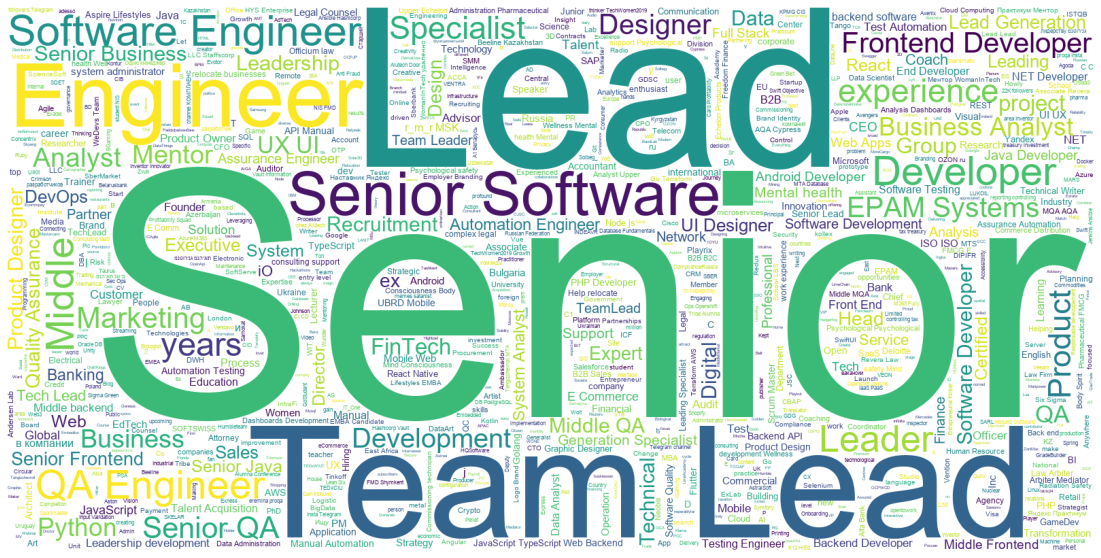

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

Остались только релевантные профессии. Удалим полные дубликаты постов

In [19]:
df.drop('relevant_users_jobs', axis=1, inplace=True)
df.drop_duplicates('post_text', inplace=True)
df

,post_text,reacted_users_info,relevant_users_info,relevant_reactions_count
0,"🎓В EDtech компанию ищем второго дизайнера, кот...",{'https://www.linkedin.com/in/ACoAACWwVPkBv6-7...,{'https://www.linkedin.com/in/ACoAAAMUSTMBzF6i...,2
1,Продолжению открытой менторской сессии “Тимлид...,{'https://www.linkedin.com/in/ACoAAAhdAtwBgdYk...,{},0
2,"Чудесна новина! 😎 ⭐ Natalia Konova M.D., съосн...",{'https://www.linkedin.com/in/ACoAABORW8gBBKOr...,{},0
3,🚀 Are you looking to enter the world of develo...,{'https://www.linkedin.com/in/ACoAAC9nLzEBwQR3...,{},0
4,Learning UX Writing with a Mentor 😎 Are you lo...,{'https://www.linkedin.com/in/ACoAADwvex4ByMeM...,{'https://www.linkedin.com/in/ACoAAC4T7VkBePX_...,2
...,...,...,...,...
561,#отзыв #pitstop #бизнес_тренинг ОТЗЫВ СВЕТЛАН...,{'https://www.linkedin.com/in/ACoAAAJNeXQBhcX7...,{},0
562,"Вы ходите на собеседования, рассказываете о се...",{'https://www.linkedin.com/in/ACoAAAMAhHQBDk2Y...,{},0
563,ОПЫТ + КОУЧИНГ ТВОРИТ ЧУДЕСА🔥Хочу поделиться с...,{'https://www.linkedin.com/in/ACoAABT7hBIBK83R...,{},0
564,Маршалл ГолдсмитБыл у него на тренинге лет 5 н...,{'https://www.linkedin.com/in/ACoAABHz7dkBH-8B...,{},0


In [20]:
df.to_csv('datasets/filtered_posts_df.csv', index=False)